# Topic: Clustering
## Devising a House Improvement Plan for a Hotel Complex in Mallorca

Your data refers to a questionnaire among customers of a hotel complex in Mallorca that consists of 30
separate houses. In each of the houses customers were asked to give feedback on several aspects of the
house and its service quality. Your data set contains for each house the percentage of positive answers
per question. The goal of the hotel management is to improve the customer ratings of the hotel
complex. Your task is to explore the data to find out which aspects and which houses are most
problematic, so that the management can set priorities.
#### Data Set Description
Name: questionnaire.csv
Attributes: They refer to the questions in the questionnaire and are measured in % of positive answers.
- value. Overall value for money.
- complaint. Handling of customer complaints.
- facilities. Bathroom.
- clean. Cleanliness.
- athm. Positive atmosphere.
- service. Service quality (reception, maid service, restaurant)
- amenities. TV, WLAN, parking, minibar, dining, pool, fitness room.
#### Assignment
1. Load the data set and view it using the View()command.
2. Discuss the dataset based on str() and summary(). What does it tell you about the houses?
I.e., what are the most problematic aspects (attributes) the management should focus on?
3. Apply K-means with 4 clusters.
4. Evaluate your clustering results using the evaluation measures discussed in class. Interpret them.
5. Interpret your clustering results:
- What is the biggest, what is the smallest cluster?
- Inspect the coordinates of the cluster means (i.e. the cluster centers) and interpret them:
What are the groups of houses the management should focus on, and why? For each group of
houses, what are the most problematic aspects?
- Estimate the average percentage of positive answers per cluster (average over the attribute
values of each cluster center-point) to get an overall performance KPI for each cluster of houses.
Which cluster has the best performance on average?
6. Try some other values for the number of clusters (instead of 4). Write down the resulting
withinss values and draw the respective graph5. What do you observe? Are 4 clusters a good
choice?

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(r"../Assignment/questionnaire.csv")
print("Loading the dataset:")
print(data)

Loading the dataset:
    value  complaint  facilities  clean  athm  service  amenities
0      43         51          30     39    61       92         45
1      63         64          51     54    63       73         47
2      71         70          68     69    76       86         48
3      61         63          45     47    54       84         35
4      81         78          56     66    71       83         47
5      43         55          49     44    54       49         34
6      58         67          42     56    66       68         35
7      71         75          50     55    70       66         41
8      72         82          72     67    71       83         31
9      67         61          45     47    62       80         41
10     64         53          53     58    58       67         34
11     67         60          47     39    59       74         41
12     69         62          57     42    55       63         25
13     68         83          83     45    59       77 

#### Dataset overview

In [3]:
print("Some statistical information about the dataset:")
print(data.describe())

Some statistical information about the dataset:
           value  complaint  facilities      clean       athm    service  \
count  30.000000  30.000000   30.000000  30.000000  30.000000  30.000000   
mean   64.633333  66.600000   53.133333  56.366667  64.633333  74.766667   
std    12.172562  13.314757   12.235430  11.737013  10.397226   9.894908   
min    40.000000  37.000000   30.000000  34.000000  43.000000  49.000000   
25%    58.750000  58.500000   45.000000  47.000000  58.250000  69.250000   
50%    65.500000  65.000000   51.500000  56.500000  63.500000  77.500000   
75%    71.750000  77.000000   62.500000  66.750000  71.000000  80.000000   
max    85.000000  90.000000   83.000000  75.000000  88.000000  92.000000   

       amenities  
count  30.000000  
mean   42.933333  
std    10.288706  
min    25.000000  
25%    35.000000  
50%    41.000000  
75%    47.750000  
max    72.000000  


AxesSubplot(0.125,0.125;0.775x0.755)


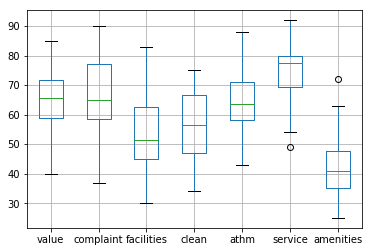

In [4]:
print(data.boxplot())

Wie wir sehen können, ist der Bewertungspunkt "Annehmlichkeiten" am tiefsten und somit am bedürftigsten. Mit dem Service hingegen scheinen mehr als die Hälfte der Befragten bei 70% der Häuser zufrieden zu sein. Spannend zu sehen ist, dass es bei service einen Outlier gibt und zwar ist dies Haus 5. Dies ist das einzige Haus, bei dem mehr negative Bewertungen als positive eingegangen sind. Auch bei amenities gibt es einen Outlier. Hier scheint Haus 25 besonders gut abgeschnitten zu haben. Mehr als 70% der Befragten sind in diesem Haus mit den amenities zufrieden.

20<5<23<0<27<12<24<10<11<3<6<22<9<1<19<21<7<29<15<18<13<17<8<4<14<2<26<25<16<28


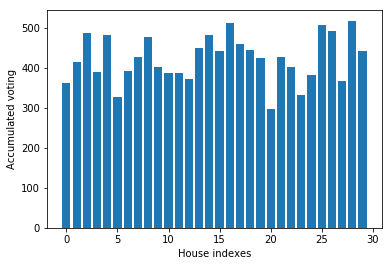

In [5]:
house_ranking = np.argsort(data.sum(axis=1))
plt.bar(data.index, data.sum(axis=1))
plt.xlabel("House indexes")
plt.ylabel("Accumulated voting")
print("<".join(map(str,house_ranking)))

Hier ist interessant zu sehen, dass Haus 25 nicht nur bei den amenities mit Abstand am besten abschnitt, sondern auch insgesamt  einen sehr guten Eindruck hinterlässt. Haus 5 hingegen, ist alles in allem das zweitschlechstete. Hier lässt also nicht nur der Service zu wünschen übrig.

## Plot jeweils zwei Dimensionen

The categories are:  ['value', 'complaint', 'facilities', 'clean', 'athm', 'service', 'amenities']


c:\python\python37\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


21


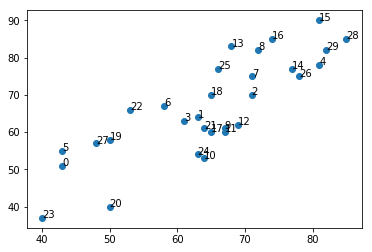

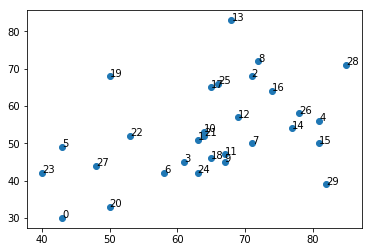

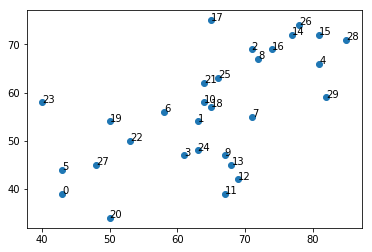

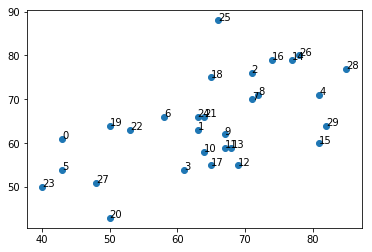

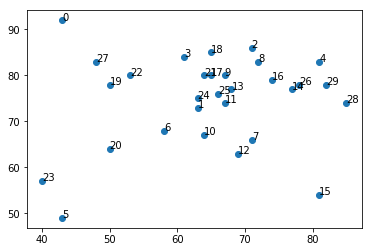

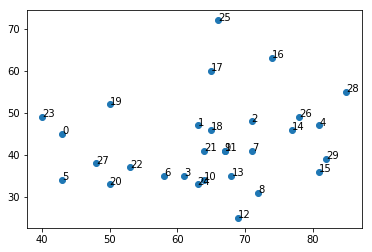

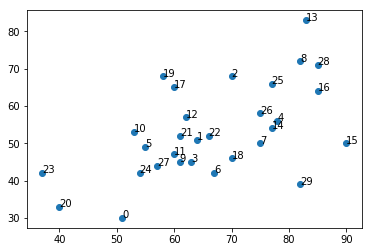

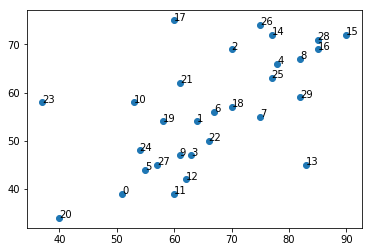

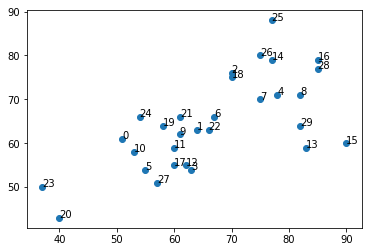

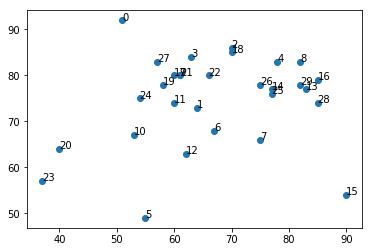

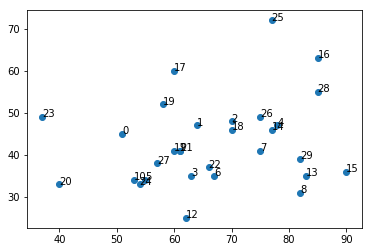

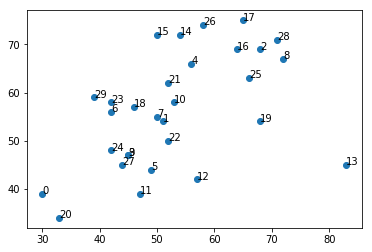

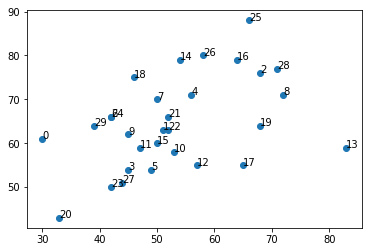

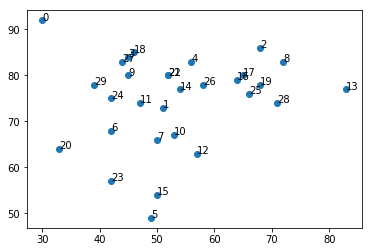

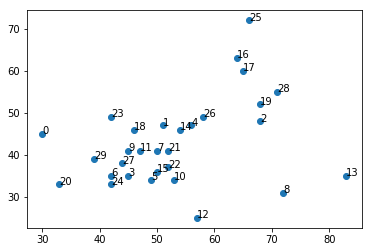

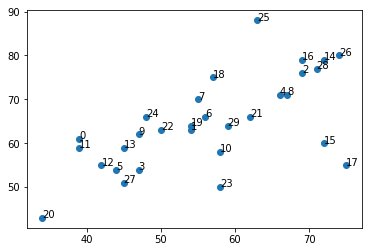

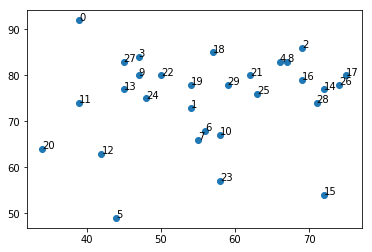

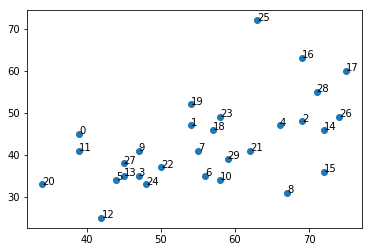

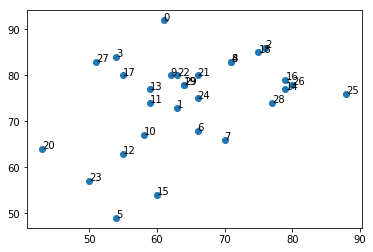

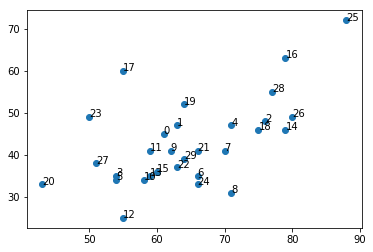

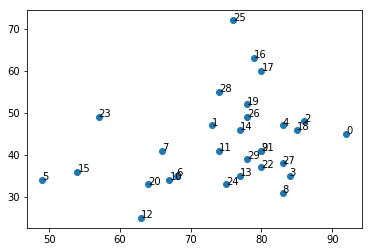

In [6]:
categories1 = list(data)
print("The categories are: ", categories1)
categories2 = categories1.copy()
plt_count=0
for index, categorie1 in enumerate(categories1):
    for categorie2 in categories2[index+1:]:
        plt_count+=1
        fig, ax = plt.subplots()
        ax.scatter(data[categorie1], data[categorie2])
        for i, value in enumerate(data[categorie1]):
            ax.annotate(i, (data[categorie1][i], data[categorie2][i]))
print(plt_count) # should be n*(n-1)/2

## PCA

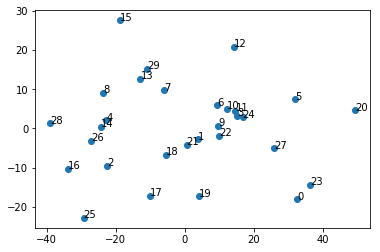

In [7]:
# http://www.apnorton.com/blog/2016/12/19/Visualizing-Multidimensional-Data-in-Python/
from sklearn.decomposition import PCA as sklearnPCA

# normalize
# No normalisation needed because valuerange is all the same

pca = sklearnPCA(n_components=2)
transformed = pd.DataFrame(pca.fit_transform(data))
fig, ax = plt.subplots()
ax.scatter(transformed[0], transformed[1])
for i, value in enumerate(transformed[0]):
    ax.annotate(i, (transformed[0][i], transformed[1][i]))

#### K-Means

In [8]:
kmeans = KMeans(n_clusters=4).fit(data)
print(kmeans.cluster_centers_)

[[44.8        48.         39.6        44.         51.8        69.
  39.8       ]
 [74.625      75.875      62.75       69.875      75.625      79.125
  55.        ]
 [74.8        82.4        58.8        59.6        64.8        71.6
  36.4       ]
 [62.         61.58333333 50.         51.16666667 62.58333333 75.58333333
  38.91666667]]


In [9]:
c0=[]
c1=[]
c2=[]
c3=[]
for index, value in enumerate(kmeans.labels_):
    if value == 0: c0.append(index) 
    if value == 1: c1.append(index)
    if value == 2: c2.append(index)
    if value == 3: c3.append(index)
print("Im ersten cluster sind die folgenden Gebäude: ", c0)
print("Im zweiten cluster sind die folgenden Gebäude: ", c1)
print("Im dritten cluster sind die folgenden Gebäude: ", c2)
print("Im vierten cluster sind die folgenden Gebäude: ", c3)

Im ersten cluster sind die folgenden Gebäude:  [0, 5, 20, 23, 27]
Im zweiten cluster sind die folgenden Gebäude:  [2, 4, 14, 16, 17, 25, 26, 28]
Im dritten cluster sind die folgenden Gebäude:  [7, 8, 13, 15, 29]
Im vierten cluster sind die folgenden Gebäude:  [1, 3, 6, 9, 10, 11, 12, 18, 19, 21, 22, 24]


In [10]:
# compare cluster values with houseranking
ranked_houses_c0=[np.where(house_ranking==house)[0][0] for house in c0]
ranked_houses_c1=[np.where(house_ranking==house)[0][0] for house in c1]
ranked_houses_c2=[np.where(house_ranking==house)[0][0] for house in c2]
ranked_houses_c3=[np.where(house_ranking==house)[0][0] for house in c3]
print("Die Häuser im ersten Cluster sind insgesamt auf folgendem Rang: ", ranked_houses_c0)
print("Die Häuser im zweiten Cluster sind insgesamt auf folgendem Rang: ", ranked_houses_c1)
print("Die Häuser im dritten Cluster sind insgesamt auf folgendem Rang: ", ranked_houses_c2)
print("Die Häuser im vierten Cluster sind insgesamt auf folgendem Rang: ", ranked_houses_c3)

Die Häuser im ersten Cluster sind insgesamt auf folgendem Rang:  [3, 1, 0, 2, 4]
Die Häuser im zweiten Cluster sind insgesamt auf folgendem Rang:  [25, 23, 24, 28, 21, 27, 26, 29]
Die Häuser im dritten Cluster sind insgesamt auf folgendem Rang:  [16, 22, 20, 18, 17]
Die Häuser im vierten Cluster sind insgesamt auf folgendem Rang:  [13, 9, 10, 12, 7, 8, 5, 19, 14, 15, 11, 6]


Man kann hier schön erkenne, dass die Cluster grundsätzlich sehr gut mit der gemittelten Bewertung übereinstimmen.

In [11]:
sse_c0=0
sse_c1=0
sse_c2=0
sse_c3=0
for house in c0:
    sse_c0 += np.sum((kmeans.cluster_centers_[0] - data.iloc[house])**2)
for house in c1:
    sse_c1 += np.sum((kmeans.cluster_centers_[1] - data.iloc[house])**2)
for house in c2:
    sse_c2 += np.sum((kmeans.cluster_centers_[2] - data.iloc[house])**2)
for house in c3:
    sse_c3 += np.sum((kmeans.cluster_centers_[3] - data.iloc[house])**2)
tot_within_sse = sse_c0 + sse_c1 + sse_c2 + sse_c3
print("Das erste Cluster hat eine within_SSE von: ", sse_c0)
print("Das zweite Cluster hat eine within_SSE von: ", sse_c1)
print("Das dritte Cluster hat eine within_SSE von: ", sse_c2)
print("Das vierte Cluster hat eine within_SSE von: ", sse_c3)
print("Die totale within SSE liegt bei: ", tot_within_sse)

Das erste Cluster hat eine within_SSE von:  2621.6
Das zweite Cluster hat eine within_SSE von:  2533.875
Das dritte Cluster hat eine within_SSE von:  2745.2000000000003
Das vierte Cluster hat eine within_SSE von:  3211.3333333333335
Die totale within SSE liegt bei:  11112.008333333335


In [12]:
# average percentage of positiv answers
avg_c0 = np.array([data.iloc[house] for house in c0]).mean()
avg_c1 = np.array([data.iloc[house] for house in c1]).mean()
avg_c2 = np.array([data.iloc[house] for house in c2]).mean()
avg_c3 = np.array([data.iloc[house] for house in c3]).mean()
print("Im Schnitt hat cluster 1 ", avg_c0, "% positive Bewertungen.")
print("Im Schnitt hat cluster 2 ", avg_c1, "% positive Bewertungen.")
print("Im Schnitt hat cluster 3 ", avg_c2, "% positive Bewertungen.")
print("Im Schnitt hat cluster 4 ", avg_c3, "% positive Bewertungen.")

Im Schnitt hat cluster 1  48.142857142857146 % positive Bewertungen.
Im Schnitt hat cluster 2  70.41071428571429 % positive Bewertungen.
Im Schnitt hat cluster 3  64.05714285714286 % positive Bewertungen.
Im Schnitt hat cluster 4  57.404761904761905 % positive Bewertungen.


Grösse von k:  1
Das erste Cluster hat eine within_SSE von:  26818.8
Das zweite Cluster hat eine within_SSE von:  0
Das dritte Cluster hat eine within_SSE von:  0
Das vierte Cluster hat eine within_SSE von:  0
Das fünfte Cluster hat eine within_SSE von:  0
Das sechste Cluster hat eine within_SSE von:  0
Das siebte Cluster hat eine within_SSE von:  0
Das achte Cluster hat eine within_SSE von:  0
Das neunte Cluster hat eine within_SSE von:  0
Das zehnte Cluster hat eine within_SSE von:  0
Die totale within SSE (-) liegt bei:  26818.8
Die totale SSE liegt bei:  478542.2
Die between cluster SSE (+) liegt bei:  451723.4
Die ratio (+) liegt bei:  0.9439572936305304

Grösse von k:  2
Das erste Cluster hat eine within_SSE von:  7912.1875
Das zweite Cluster hat eine within_SSE von:  7910.357142857142
Das dritte Cluster hat eine within_SSE von:  0
Das vierte Cluster hat eine within_SSE von:  0
Das fünfte Cluster hat eine within_SSE von:  0
Das sechste Cluster hat eine within_SSE von:  0
Das sieb

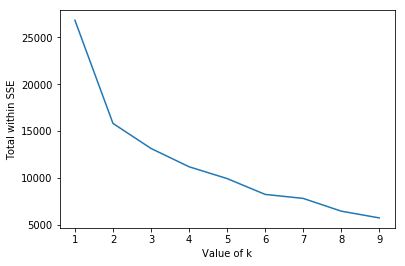

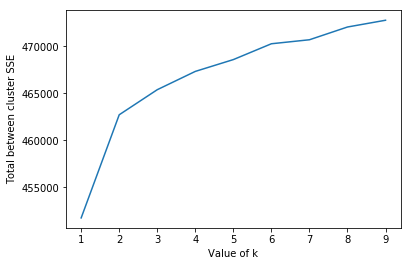

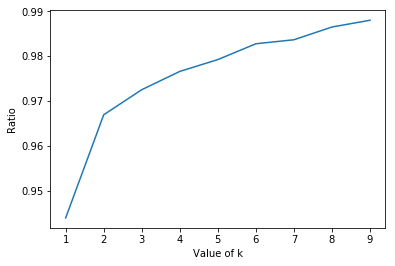

In [13]:
center_of_data=data.mean()
within_sse_per_k = []
between_cluster_sse_per_k = []
ratios = []
# evaluate number of clusters with elbow-method
for i in range(1, 10):
    print("Grösse von k: ", i)
    kmeans = KMeans(n_clusters=i).fit(data)
    _c0=[]
    _c1=[]
    _c2=[]
    _c3=[]
    _c4=[]
    _c5=[]
    _c6=[]
    _c7=[]
    _c8=[]
    _c9=[]
    for index, value in enumerate(kmeans.labels_):
        if value == 0: _c0.append(index) 
        if value == 1: _c1.append(index)
        if value == 2: _c2.append(index)
        if value == 3: _c3.append(index)
        if value == 4: _c4.append(index)
        if value == 5: _c5.append(index)
        if value == 6: _c6.append(index)
        if value == 7: _c7.append(index)
        if value == 8: _c8.append(index)
        if value == 9: _c9.append(index)
    sse_c0=0
    sse_c1=0
    sse_c2=0
    sse_c3=0
    sse_c4=0
    sse_c5=0
    sse_c6=0
    sse_c7=0
    sse_c8=0
    sse_c9=0
    for house in _c0:
        sse_c0 += np.sum((kmeans.cluster_centers_[0] - data.iloc[house])**2)
    for house in _c1:
        sse_c1 += np.sum((kmeans.cluster_centers_[1] - data.iloc[house])**2)
    for house in _c2:
        sse_c2 += np.sum((kmeans.cluster_centers_[2] - data.iloc[house])**2)
    for house in _c3:
        sse_c3 += np.sum((kmeans.cluster_centers_[3] - data.iloc[house])**2)
    for house in _c4:
        sse_c4 += np.sum((kmeans.cluster_centers_[4] - data.iloc[house])**2)
    for house in _c5:
        sse_c5 += np.sum((kmeans.cluster_centers_[5] - data.iloc[house])**2)
    for house in _c6:
        sse_c6 += np.sum((kmeans.cluster_centers_[6] - data.iloc[house])**2)
    for house in _c7:
        sse_c7 += np.sum((kmeans.cluster_centers_[7] - data.iloc[house])**2)
    for house in _c8:
        sse_c8 += np.sum((kmeans.cluster_centers_[8] - data.iloc[house])**2)
    for house in _c9:
        sse_c9 += np.sum((kmeans.cluster_centers_[9] - data.iloc[house])**2)
    tot_within_sse = sse_c0 + sse_c1 + sse_c2 + sse_c3 + sse_c4 + sse_c5 + sse_c6 + sse_c7 + sse_c8 + sse_c9
    within_sse_per_k.append(tot_within_sse)
    tot_sse = np.sum([(center_of_data - data_point[0])**2 for data_point in data.iterrows()])
    between_cluster_sse = tot_sse - tot_within_sse
    between_cluster_sse_per_k.append(between_cluster_sse)
    ratio=between_cluster_sse/tot_sse
    ratios.append(ratio)
    print("Das erste Cluster hat eine within_SSE von: ", sse_c0)
    print("Das zweite Cluster hat eine within_SSE von: ", sse_c1)
    print("Das dritte Cluster hat eine within_SSE von: ", sse_c2)
    print("Das vierte Cluster hat eine within_SSE von: ", sse_c3)
    print("Das fünfte Cluster hat eine within_SSE von: ", sse_c4)
    print("Das sechste Cluster hat eine within_SSE von: ", sse_c5)
    print("Das siebte Cluster hat eine within_SSE von: ", sse_c6)
    print("Das achte Cluster hat eine within_SSE von: ", sse_c7)
    print("Das neunte Cluster hat eine within_SSE von: ", sse_c8)
    print("Das zehnte Cluster hat eine within_SSE von: ", sse_c9)
    print("Die totale within SSE (-) liegt bei: ", tot_within_sse)
    print("Die totale SSE liegt bei: ", tot_sse)
    print("Die between cluster SSE (+) liegt bei: ", between_cluster_sse)
    print("Die ratio (+) liegt bei: ", ratio)
    print("==================================================\n")
plt.plot([i for i in range(1, len(within_sse_per_k)+1)], within_sse_per_k)
plt.xlabel("Value of k")
plt.ylabel("Total within SSE")
plt.show()
plt.plot([i for i in range(1, len(between_cluster_sse_per_k)+1)], between_cluster_sse_per_k)
plt.xlabel("Value of k")
plt.ylabel("Total between cluster SSE")
plt.show()
plt.plot([i for i in range(1, len(ratios)+1)], ratios)
plt.xlabel("Value of k")
plt.ylabel("Ratio")
plt.show()

Gemäss Elbow-method können also k=2, k=3 und k=5 als potentielle Kandidaten erachtet werden.

## Plots inkl. Clusters

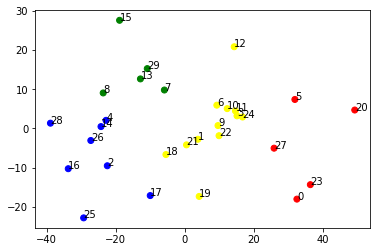

In [14]:
# Plot von PCA inkl. Clustercenters
from sklearn.decomposition import PCA as sklearnPCA

# normalize
# No normalisation needed because valuerange is all the same

# prepare clusters
colormask = []
for house in data.iterrows():
    if house[0] in c0: 
        colormask.append('red')
    elif house[0] in c1: 
        colormask.append('blue')
    elif house[0] in c2: 
        colormask.append('green')
    elif house[0] in c3: 
        colormask.append('yellow')
    
pca = sklearnPCA(n_components=2)
transformed = pd.DataFrame(pca.fit_transform(data))
fig, ax = plt.subplots()
ax.scatter(transformed[0], transformed[1], color=colormask)
for i, value in enumerate(transformed[0]):
    ax.annotate(i, (transformed[0][i], transformed[1][i]))

The categories are:  ['value', 'complaint', 'facilities', 'clean', 'athm', 'service', 'amenities']


c:\python\python37\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


21


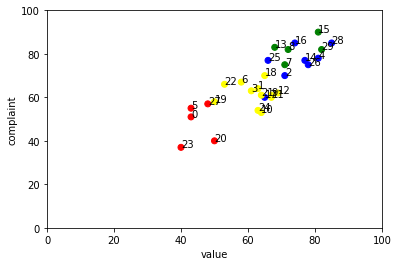

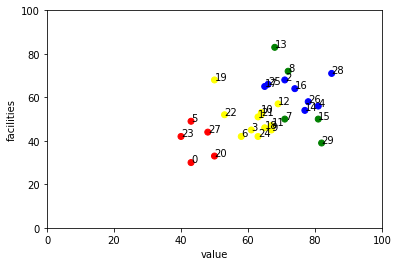

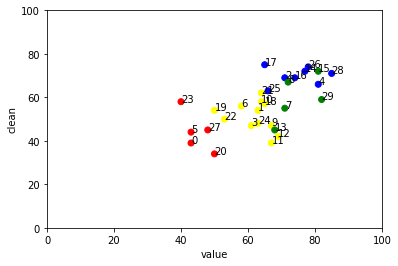

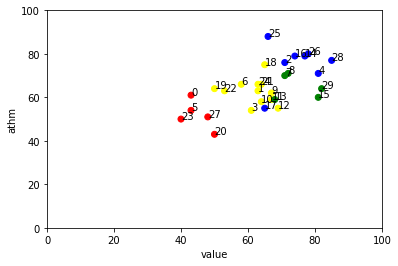

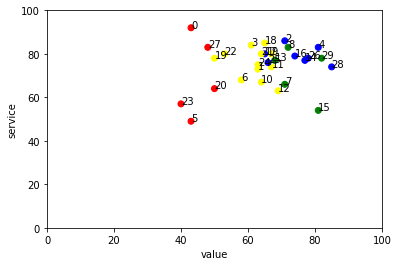

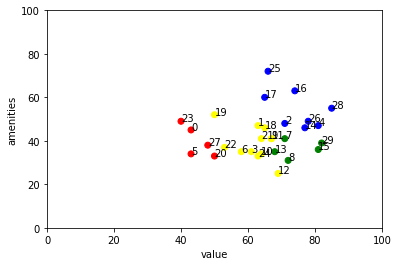

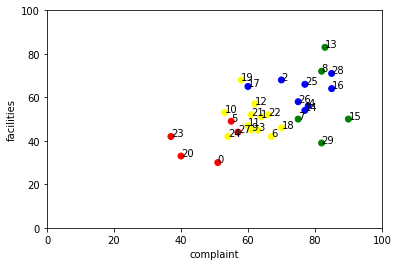

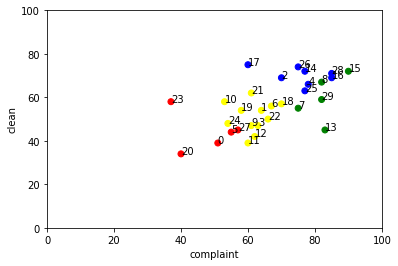

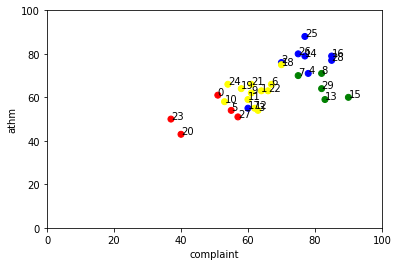

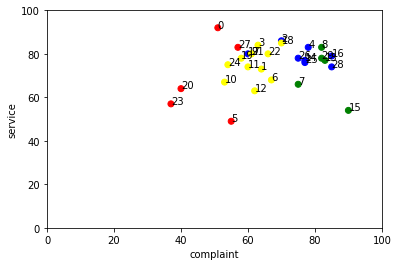

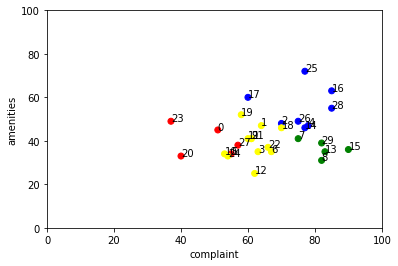

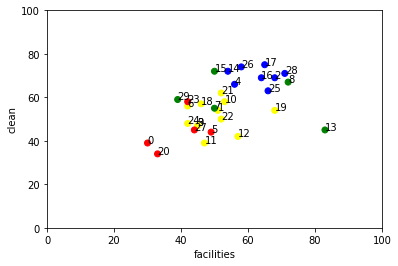

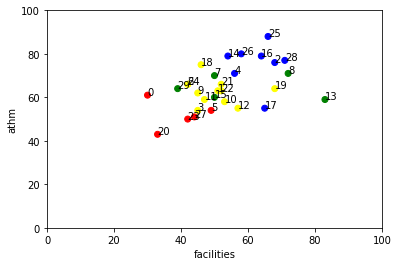

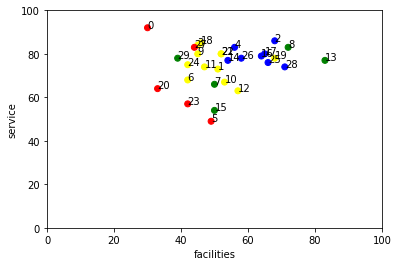

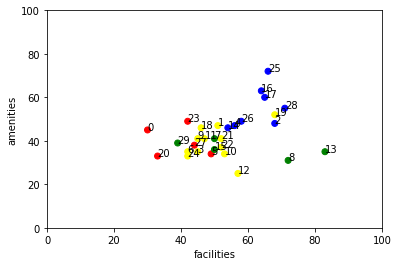

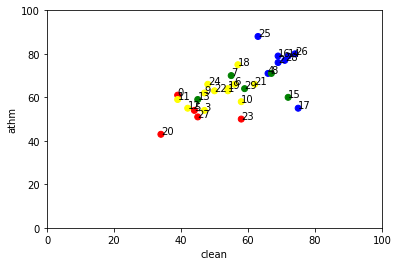

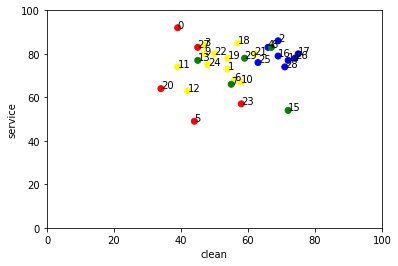

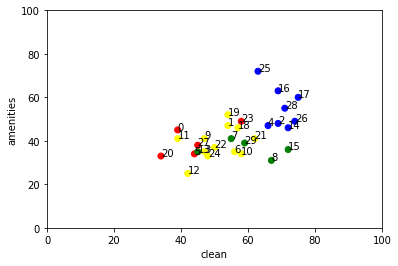

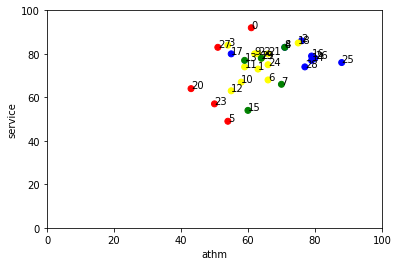

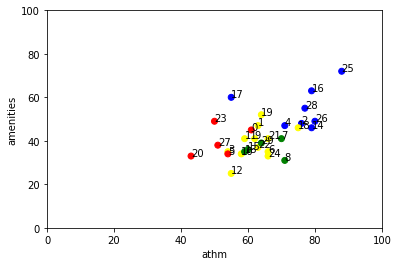

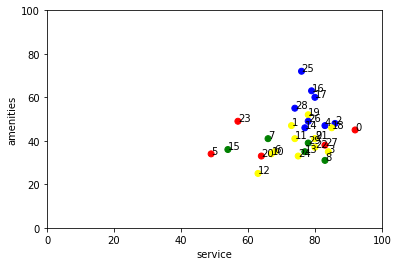

In [15]:
# prepare clusters
colormask = []
for house in data.iterrows():
    if house[0] in c0: 
        colormask.append('red')
    elif house[0] in c1: 
        colormask.append('blue')
    elif house[0] in c2: 
        colormask.append('green')
    elif house[0] in c3: 
        colormask.append('yellow')

categories1 = list(data)
print("The categories are: ", categories1)
categories2 = categories1.copy()
plt_count=0
for index, categorie1 in enumerate(categories1):
    for categorie2 in categories2[index+1:]:
        plt_count+=1
        fig, ax = plt.subplots()
        ax.scatter(data[categorie1], data[categorie2], color=colormask)
        ax.set_xlabel(categorie1)
        ax.set_ylabel(categorie2)
        ax.set_xlim([0, 100])
        ax.set_ylim([0, 100])
        for i, value in enumerate(data[categorie1]):
            ax.annotate(i, (data[categorie1][i], data[categorie2][i]))
print(plt_count) # should be n*(n-1)/2

## Beantwortung der Fragen

1. Load the data set and view it using the View()command.

Siehe oben.

2. Discuss the dataset based on str() and summary(). What does it tell you about the houses?
I.e., what are the most problematic aspects (attributes) the management should focus on?

Wie wir sehen können, ist der Bewertungspunkt "Annehmlichkeiten" am tiefsten und somit am bedürftigsten. Mit dem Service hingegen scheinen mehr als die Hälfte der Befragten bei 70% der Häuser zufrieden zu sein. Spannend zu sehen ist, dass es bei service einen Outlier gibt und zwar ist dies Haus 5. Dies ist das einzige Haus, bei dem mehr negative Bewertungen als positive eingegangen sind. Auch bei amenities gibt es einen Outlier. Hier scheint Haus 25 besonders gut abgeschnitten zu haben. Mehr als 70% der Befragten sind in diesem Haus mit den amenities zufrieden.

3. Apply K-means with 4 clusters.

Siehe oben.

4. Evaluate your clustering results using the evaluation measures discussed in class. Interpret them.
5. Interpret your clustering results:
- What is the biggest, what is the smallest cluster?
- Inspect the coordinates of the cluster means (i.e. the cluster centers) and interpret them:
What are the groups of houses the management should focus on, and why? For each group of
houses, what are the most problematic aspects?
- Estimate the average percentage of positive answers per cluster (average over the attribute
values of each cluster center-point) to get an overall performance KPI for each cluster of houses.
Which cluster has the best performance on average?
6. Try some other values for the number of clusters (instead of 4). Write down the resulting
withinss values and draw the respective graph5. What do you observe? Are 4 clusters a good
choice?